In [1]:
%cd ..

d:\workspace\VQA


In [2]:
import pandas as pd
from config import  config
from model.vqa_model import VQAModel
from transformers import AutoTokenizer
from training import VQADataCollatorForGeneration, tokenizer
from model.processor import VQAProcessor
import torch

c:\Users\Admin\anaconda3\envs\vqa\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Admin\anaconda3\envs\vqa\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [3]:
from data_processor import VQADataset
from torchvision import transforms
df_train = pd.read_csv("./dataset/csv/train_data.csv")
df_val = pd.read_csv("./dataset/csv/dev_data.csv")
df_test = pd.read_csv("./dataset/csv/test_data.csv")
transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

train_dataset = VQADataset(dataframe=df_train.loc[:5], mode="train", transform=transforms)
# val_dataset = VQADataset(dataframe=df_val, mode="val", transform=transforms)
# test_dataset = VQADataset(dataframe=df_test, mode="test", transform=transforms)


d:\workspace\VQA\data_processor.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['question'] = [word_tokenize(text_normalize(x), format='text') for x in df['question']]
d:\workspace\VQA\data_processor.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['answer'] = [word_tokenize(text_normalize(str(x)), format='text') for x in df['answer']]


In [4]:
data = train_dataset[0]
image = data["image"]
question = data["question"]
answer = data['answer']

model = VQAModel(text_model=config.text_model, image_model=config.image_model)
processor = VQAProcessor()
out_process = processor(image, question)

pixel_values = out_process["pixel_values"]
input_ids = out_process["input_ids"]
attention_mask = out_process["attention_mask"]

# output = model(pixel_values=pixel_values, input_ids=input_ids, attention_mask=attention_mask)

output = model.generate(images=image, questions=question, max_length=64, processor=processor)
print(output)

It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


Starting generate...
Pixel values shape: torch.Size([1, 3, 224, 224])
Input IDs: tensor([[  0, 262, 701, 148, 114,   2,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
           1,   1,   1,   1,   1,   1,   1,   1]])
Attention mask: tensor([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
ViT hidden shape: torch.Size([1, 768])
PhoBERT hidden shape: torch.Size([1, 768])
Fused hidden sample: tensor([ 0.0198, -0.1046, -0.2180,  0.3998,  0.2303], grad_fn=<SliceBackward0>)
BOS token ID: 0
EOS token ID: 2
Step 0:
Decoder embeds shape: torch.Size([1, 1, 768])
Decoder outputs shape: torch.Size([1, 1, 768])

biển ghi gì ?
ghi đường hồ chí_minh


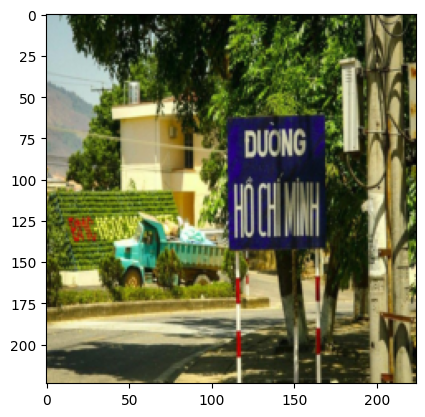

In [5]:
import matplotlib.pyplot as plt
print(question)
print(answer)
plt.imshow(image.permute(1, 2, 0))

In [6]:
predicted_answer = processor.tokenizer.decode(output)
print(predicted_answer)

<s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s> <s>
